In [1]:
import multinet_lib

import pathlib
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import henhoe2vec as hh2v
import ast
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


#from node2vec import Node2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#Modelling
from sklearn.mixture import GaussianMixture
import sklearn
from copy import deepcopy


#OT
import ot
from gmmot import *


In [2]:
def plot2D_embeddings(path,true_blocks,save=False):
    df = pd.read_csv(path.parent / (path.name + '.csv'), sep="\t", index_col=0, header=None)

    df_embed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df.values)
    df_embed = pd.DataFrame(df_embed,columns=['x','y'])

    df_embed.index = [ast.literal_eval(tpl) for tpl in df.index]
    df_embed["node"],df_embed["layer"] = zip(*df_embed.index.tolist())

    node_to_block = [block for block in range(len(true_blocks)) for _ in range(true_blocks[block])]
    df_embed['block'] = [node_to_block[int(float(node))] for node in df_embed['node']]

    

    
    plt.figure()
    ax = sns.scatterplot(df_embed,x='x',y='y',hue='block',style='layer',palette="deep") #,ax=axs[i])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    if save:
        plt.savefig(path.parent / (path.name + '.png'))

    plt.show()

    return df.values,df_embed


def block_mixing_over_layers(layers,blocks,mixing_chance):
    ml_blocks=[]
    n_blocks= len(blocks)
    for l in range(layers):
        #Mix blocks on layer depending on block_mixing_chance
        mixed_blocks=np.copy(blocks)
        for i in range(n_blocks-1):
            if np.random.rand()<mixing_chance:
                mixed_blocks[i+1] += mixed_blocks[i] 
                mixed_blocks[i] = 0  
        ml_blocks.append(mixed_blocks)
    return np.asarray(ml_blocks,dtype=int)

def fit_GMM(pts,n_components,title=None, ax=None):

    nsamples, _  = pts.shape
    flat_pts = pts.reshape((nsamples,-1))

    gmm = GaussianMixture(n_components=n_components, random_state=0).fit(flat_pts )
    #plot_ellipses(gmm,pts,title=title,ax=ax)
    return gmm

In [9]:
#Outputs
path = pathlib.Path().resolve()
save_path = path / "resources"

#SBM params
inner_connectivity = 0.6
outer_connectivity = 0.1
layers = 3
SBM_samples = 1

#Create true blocks and mix them over layers
true_blocks = [[20,5,10,20,5],np.random.randint(100,size=(10)),np.random.randint(150,size=(7)),np.random.randint(100,size=(10))]
mixed_blocks = [block_mixing_over_layers(layers,true_block,0.3) for true_block in true_blocks]

(20, 2)
(5, 2)
(30, 2)
(5, 2)
(25, 2)
(10, 2)
(20, 2)
(5, 2)
(25, 2)
(10, 2)
(20, 2)
(5, 2)
[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 0 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 0 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/SBM0_s0_embedded.csv
[STATUS] Finished learning and saving embeddings in 0 seconds
Completed multilayer network embedding in 1.1496055126190186 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.
            x         y  block  layer
0    0.762972  0.861038      0      0
1    0.755070  0.615903      0      0
2    0.853005  0.874869      0      0
3    0.665975  0.759389      0      0
4    0.506984  0.857083      0      0
..        ...       ..

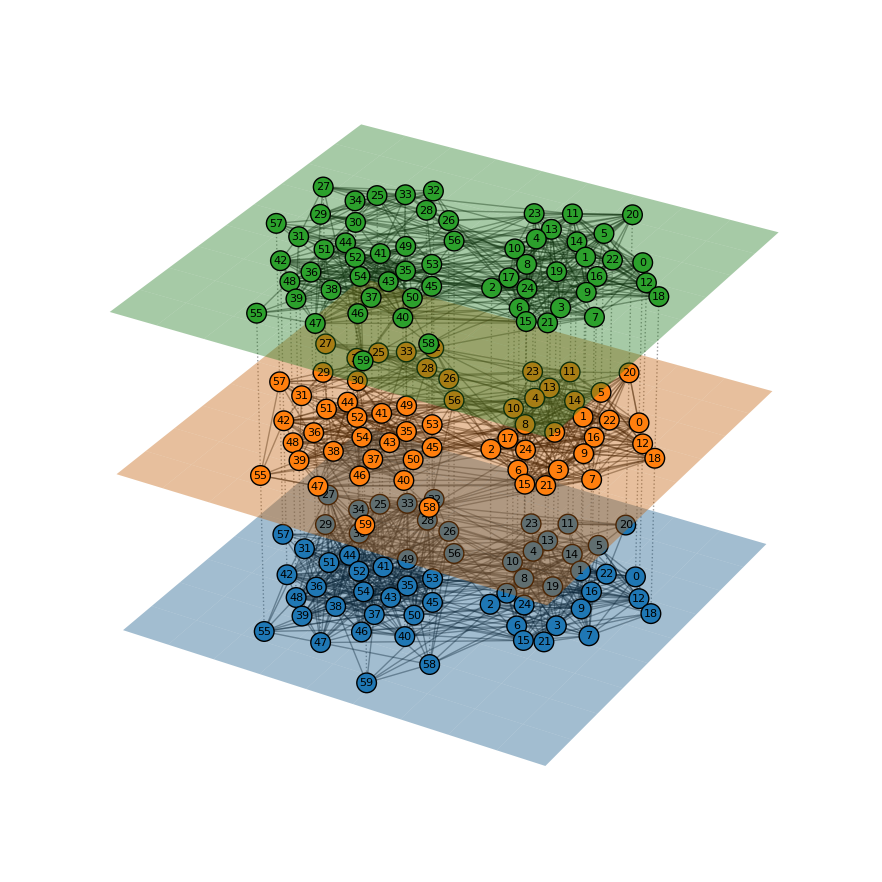

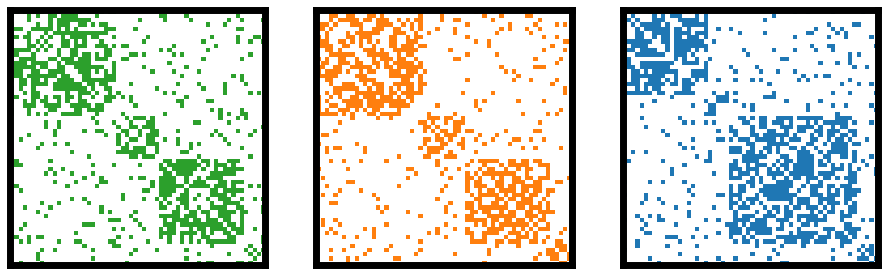

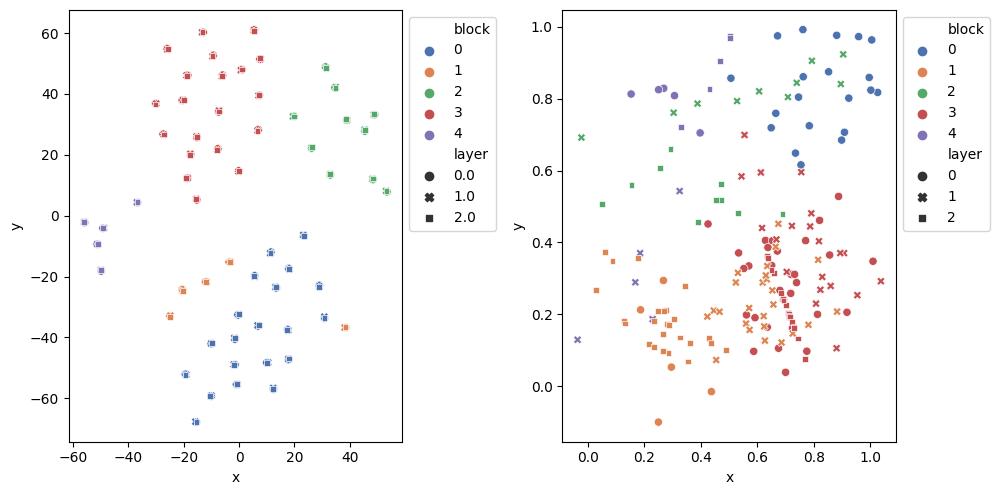

(172, 2)
(107, 2)
(76, 2)
(88, 2)
(29, 2)
(54, 2)
(71, 2)
(54, 2)
(47, 2)
(10, 2)
(97, 2)
(164, 2)
(83, 2)
(71, 2)
(54, 2)
(57, 2)
(97, 2)
(76, 2)
(88, 2)
(29, 2)
(54, 2)
[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 31 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 20 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/SBM1_s0_embedded.csv
[STATUS] Finished learning and saving embeddings in 3 seconds
Completed multilayer network embedding in 55.27802610397339 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.
             x         y  block  layer
0     0.948598  0.206739      2      0
1     0.917435  0.260136      2      0
2     0.945808  0.211060      2      0
3     0.920425

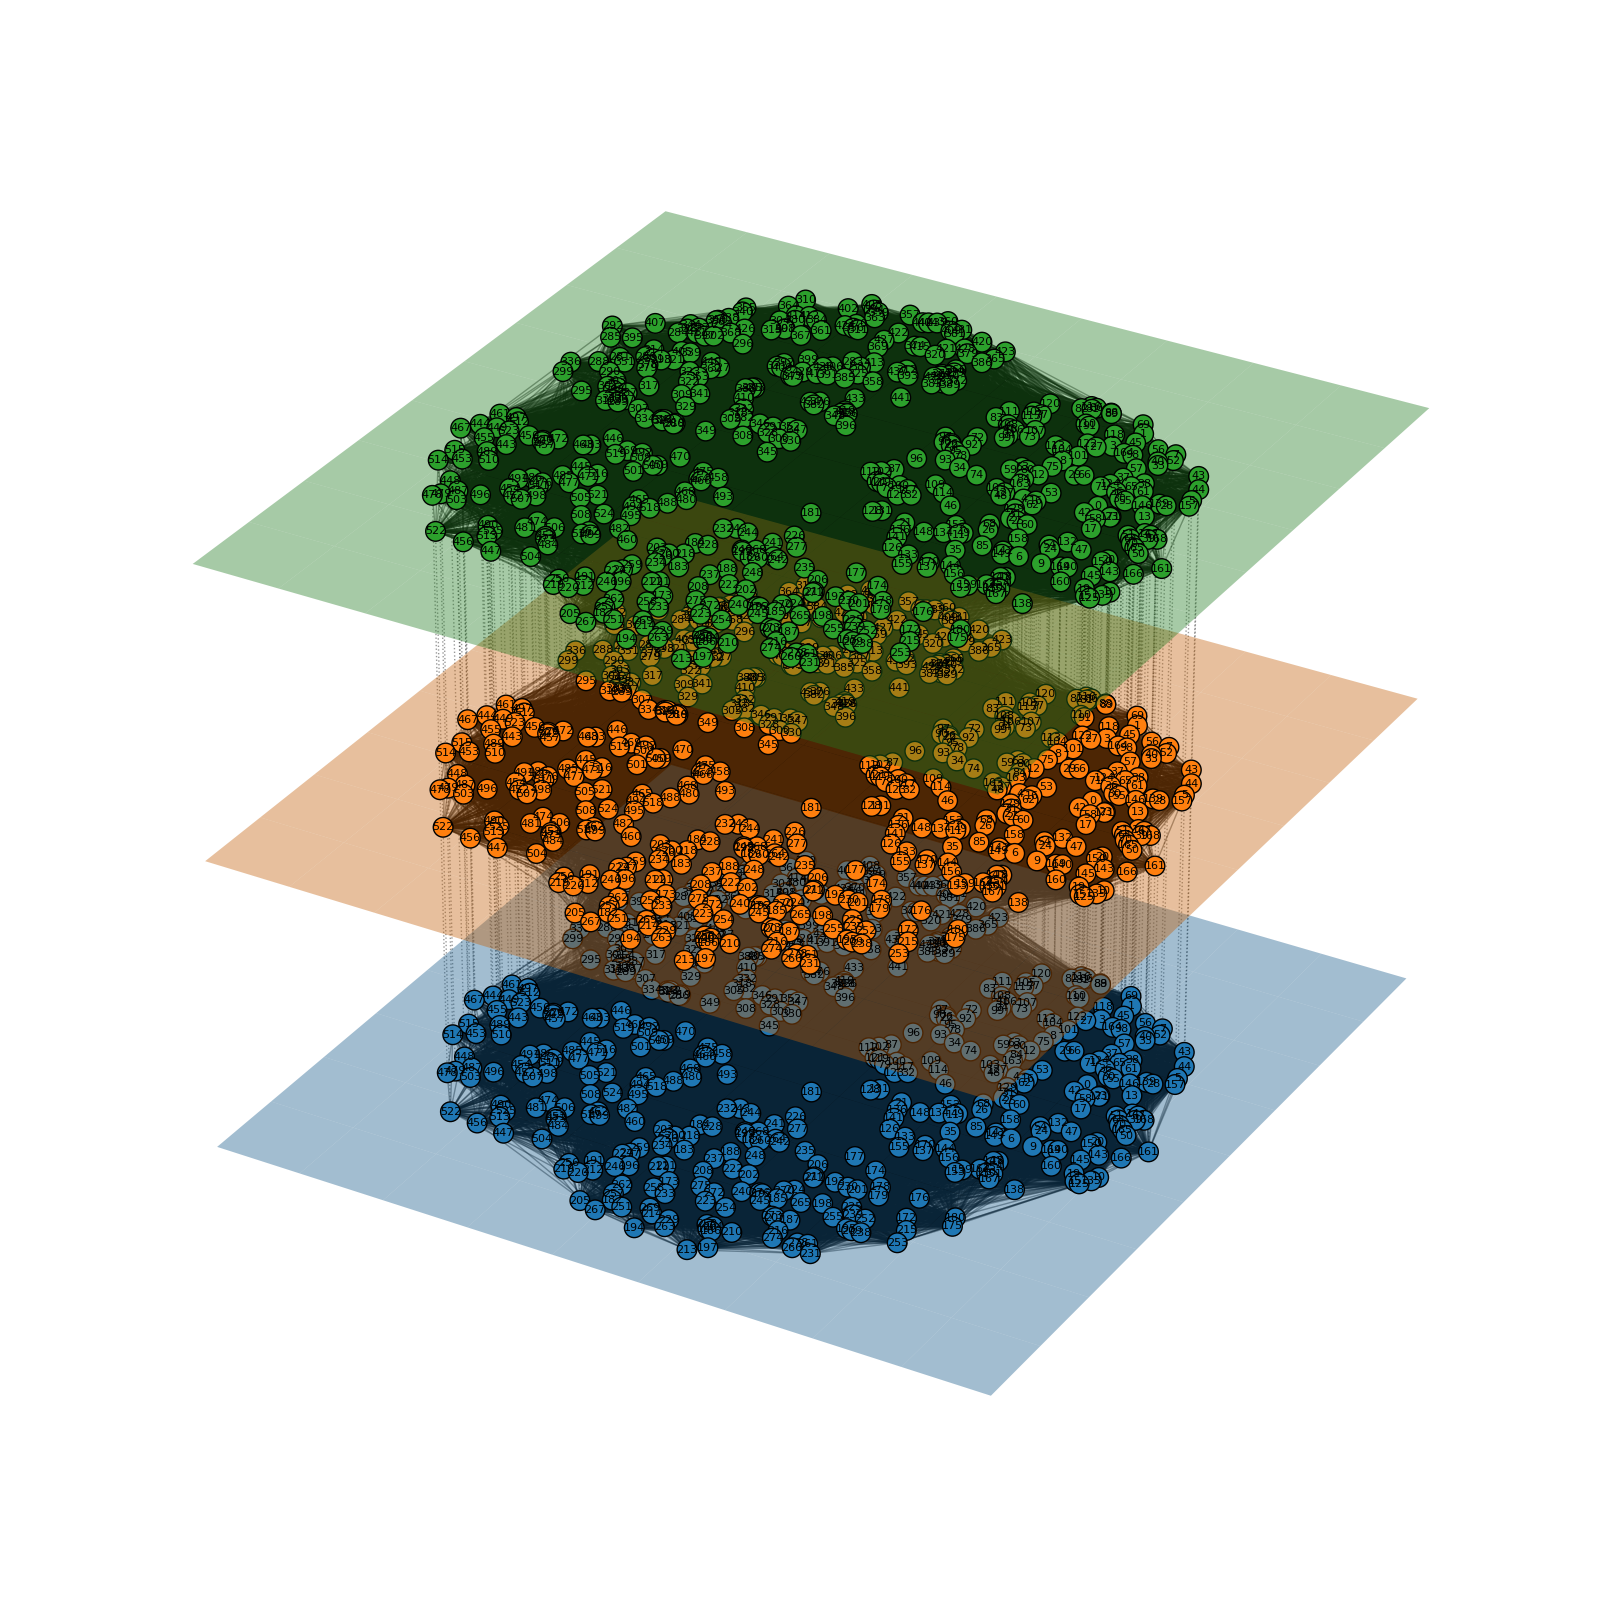

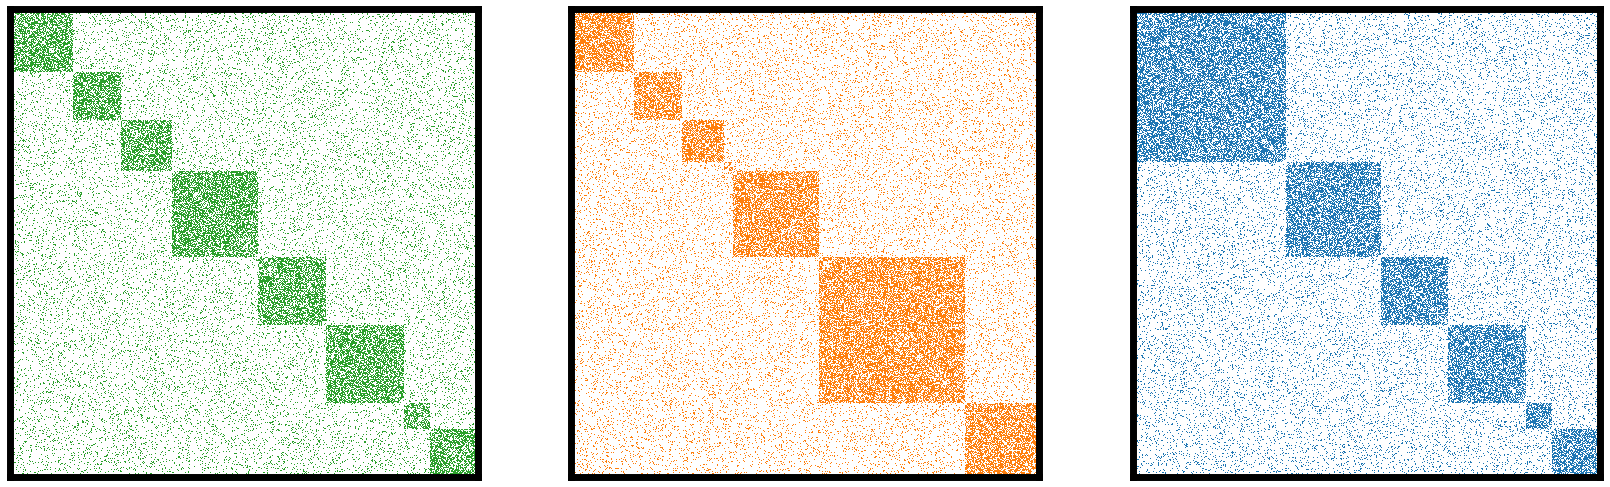

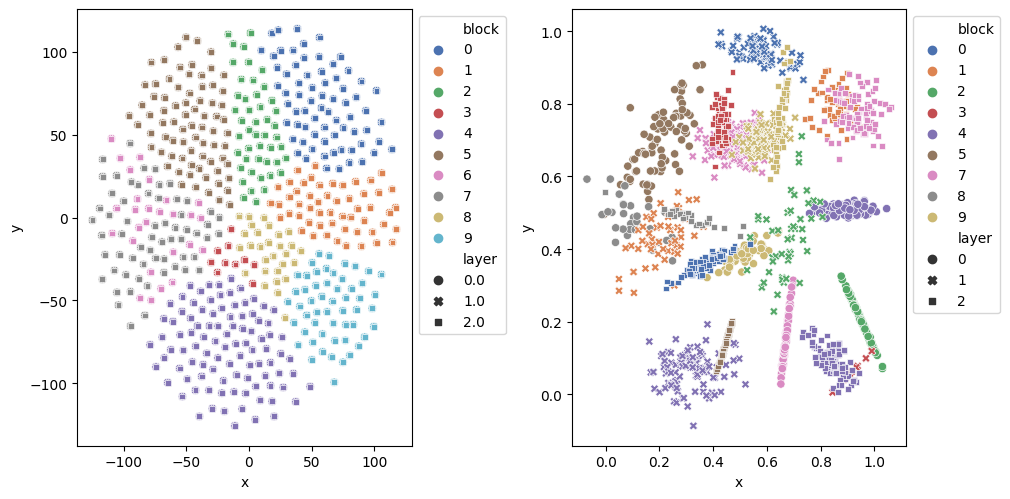

(204, 2)
(9, 2)
(9, 2)
(124, 2)
(129, 2)
(11, 2)
(202, 2)
(9, 2)
(124, 2)
(129, 2)
(11, 2)
(140, 2)
(53, 2)
(9, 2)
(9, 2)
(124, 2)
(129, 2)
[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 41 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 22 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/SBM2_s0_embedded.csv
[STATUS] Finished learning and saving embeddings in 3 seconds
Completed multilayer network embedding in 67.4409430027008 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.
             x         y  block  layer
0     0.575808  0.087285      2      0
1     0.613381  0.066930      2      0
2     0.580331  0.033145      2      0
3     0.595959 -0.033020      2      0
4     0

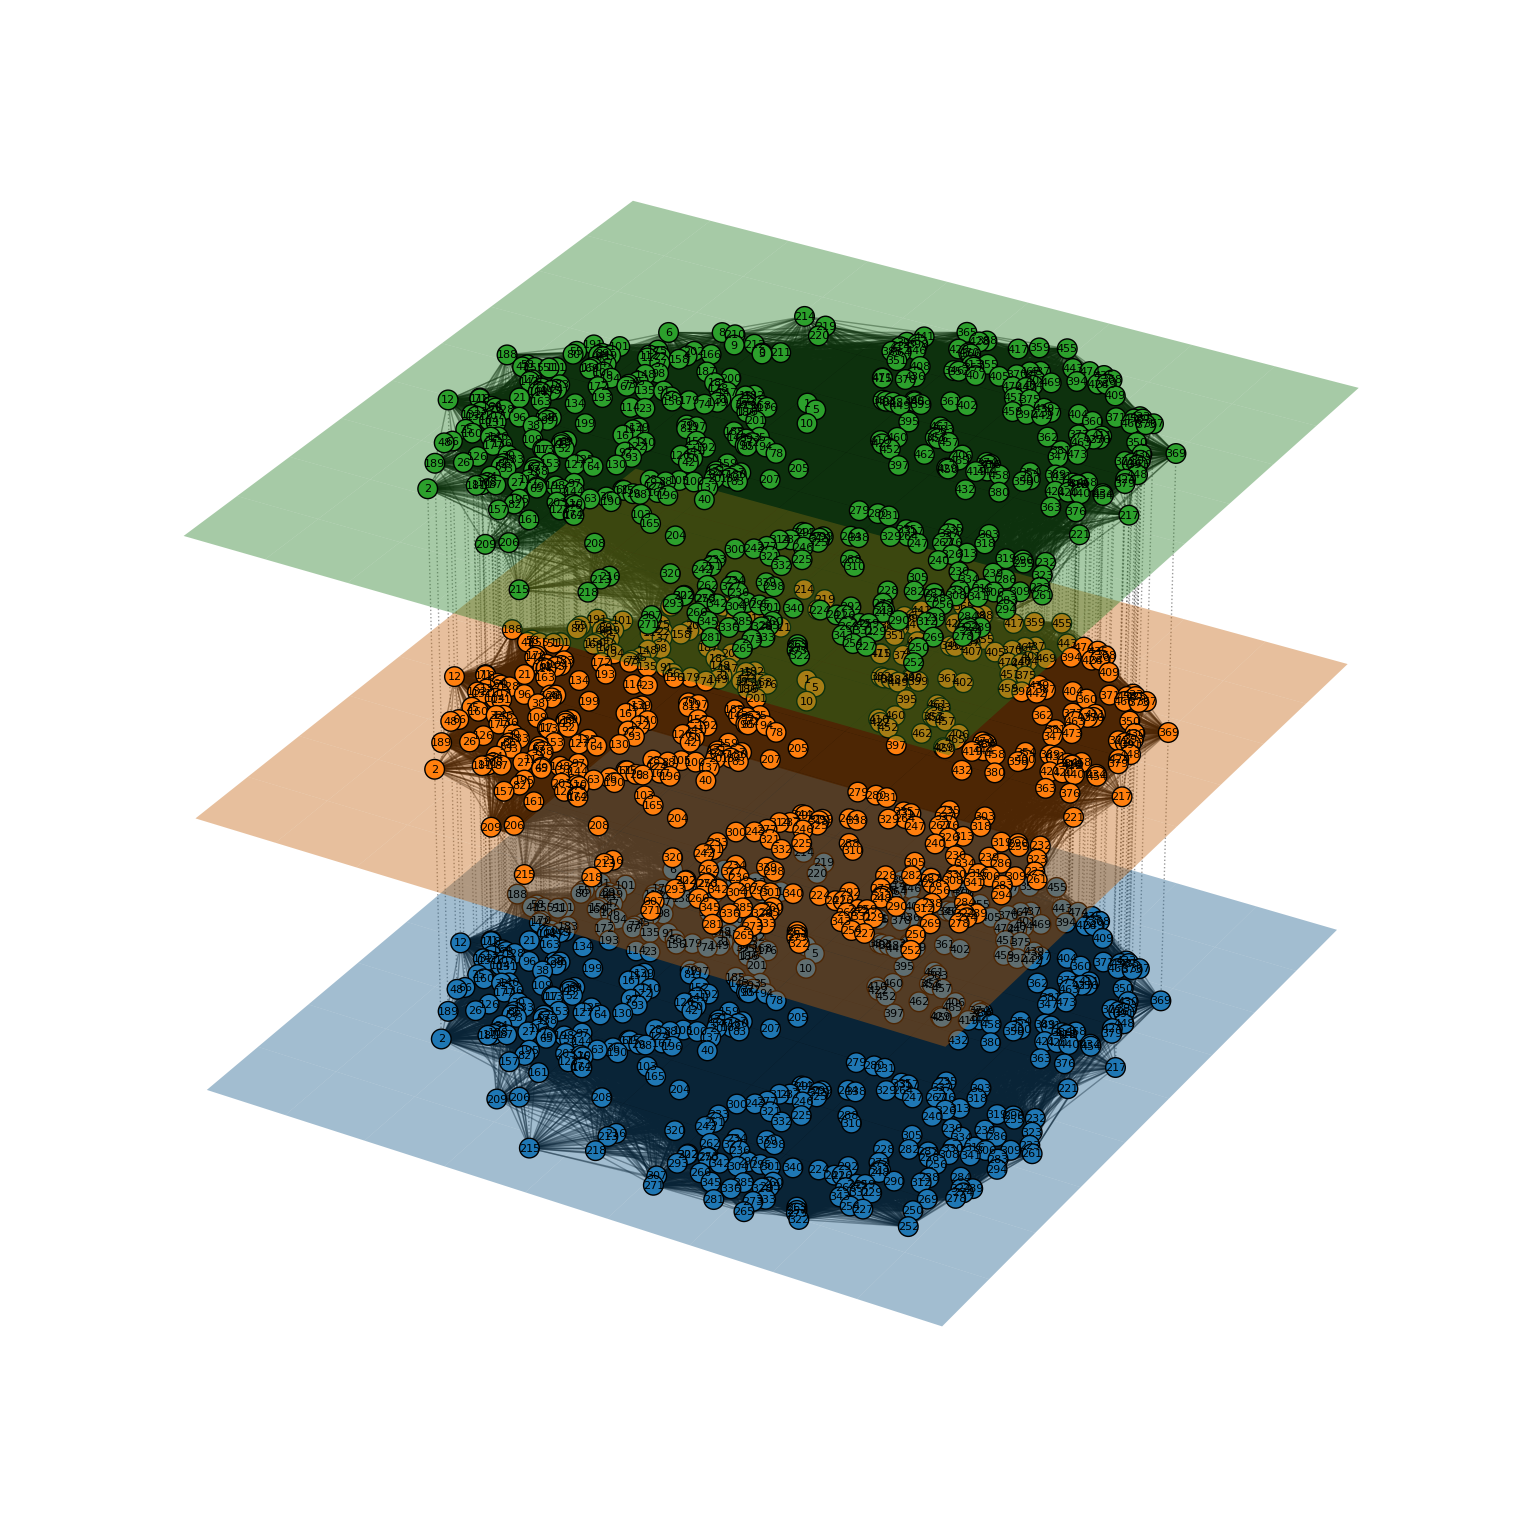

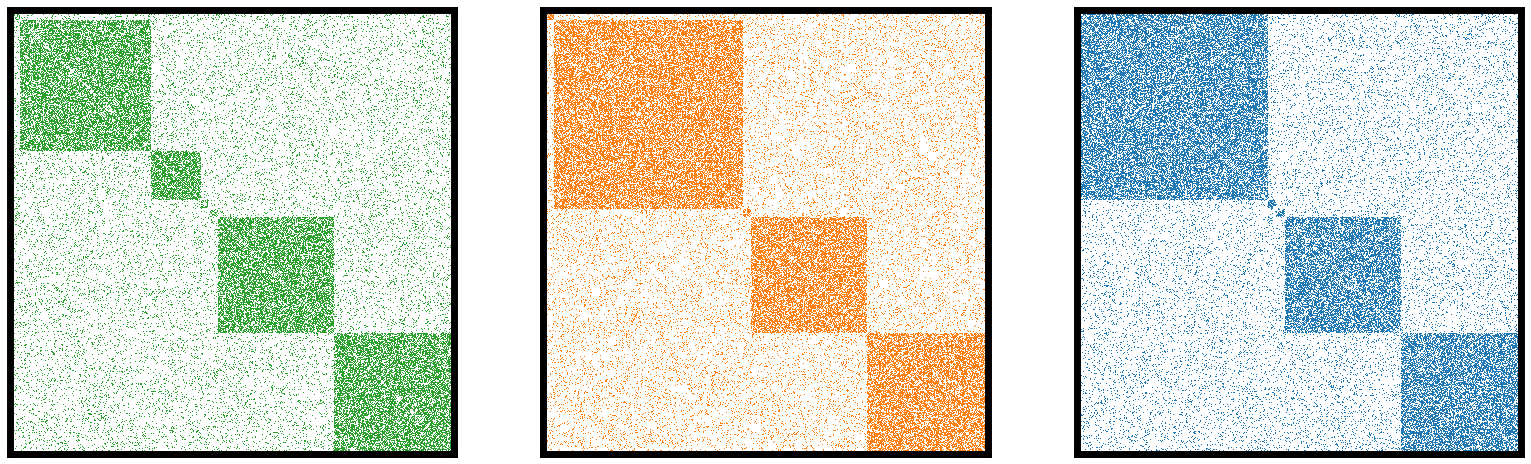

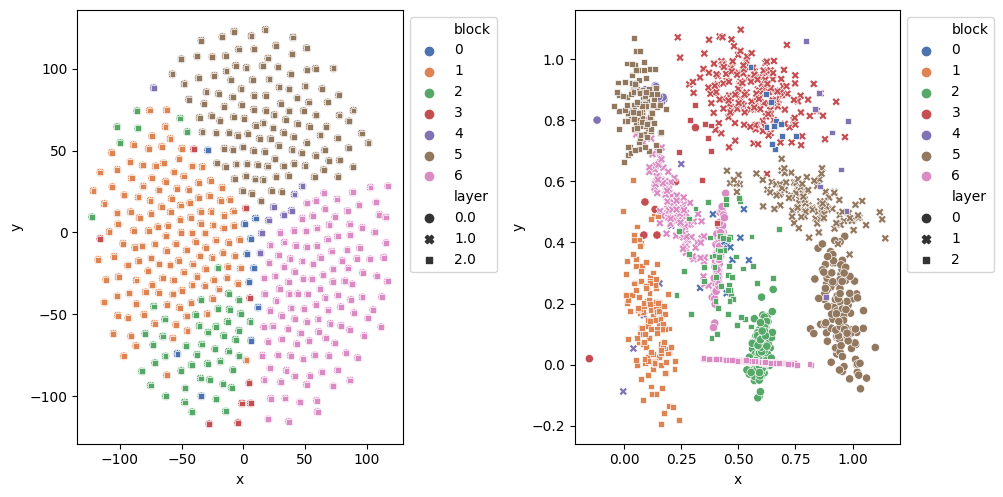

(18, 2)
(82, 2)
(80, 2)
(29, 2)
(13, 2)
(119, 2)
(18, 2)
(112, 2)
(50, 2)
(8, 2)
(74, 2)
(79, 2)
(18, 2)
(82, 2)
(13, 2)
(67, 2)
(8, 2)
(21, 2)
(53, 2)
(79, 2)
[STATUS] Started parsing edgelist...
[STATUS] Finished parsing edgelist in 0 seconds
[STATUS] Started preprocessing transition probabilities...
[STATUS] Finished preprocessing transition probabilities in 10 seconds
[STATUS] Started generating random walks...
[STATUS] Finished generating random walks in 9 seconds
[STATUS] Started learning and saving embeddings...
[STATUS] Saved embeddings to /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources/SBM3_s0_embedded.csv
[STATUS] Finished learning and saving embeddings in 2 seconds
Completed multilayer network embedding in 23.133082389831543 seconds. See results in /home/kuehn/MP_GMM_FGW/MP.ML-FGM/code/resources.
             x         y  block  layer
0     0.653625  0.116508      0      0
1     0.668542  0.157740      0      0
2     0.623748  0.173452      0      0
3     0.608388  0.184896 

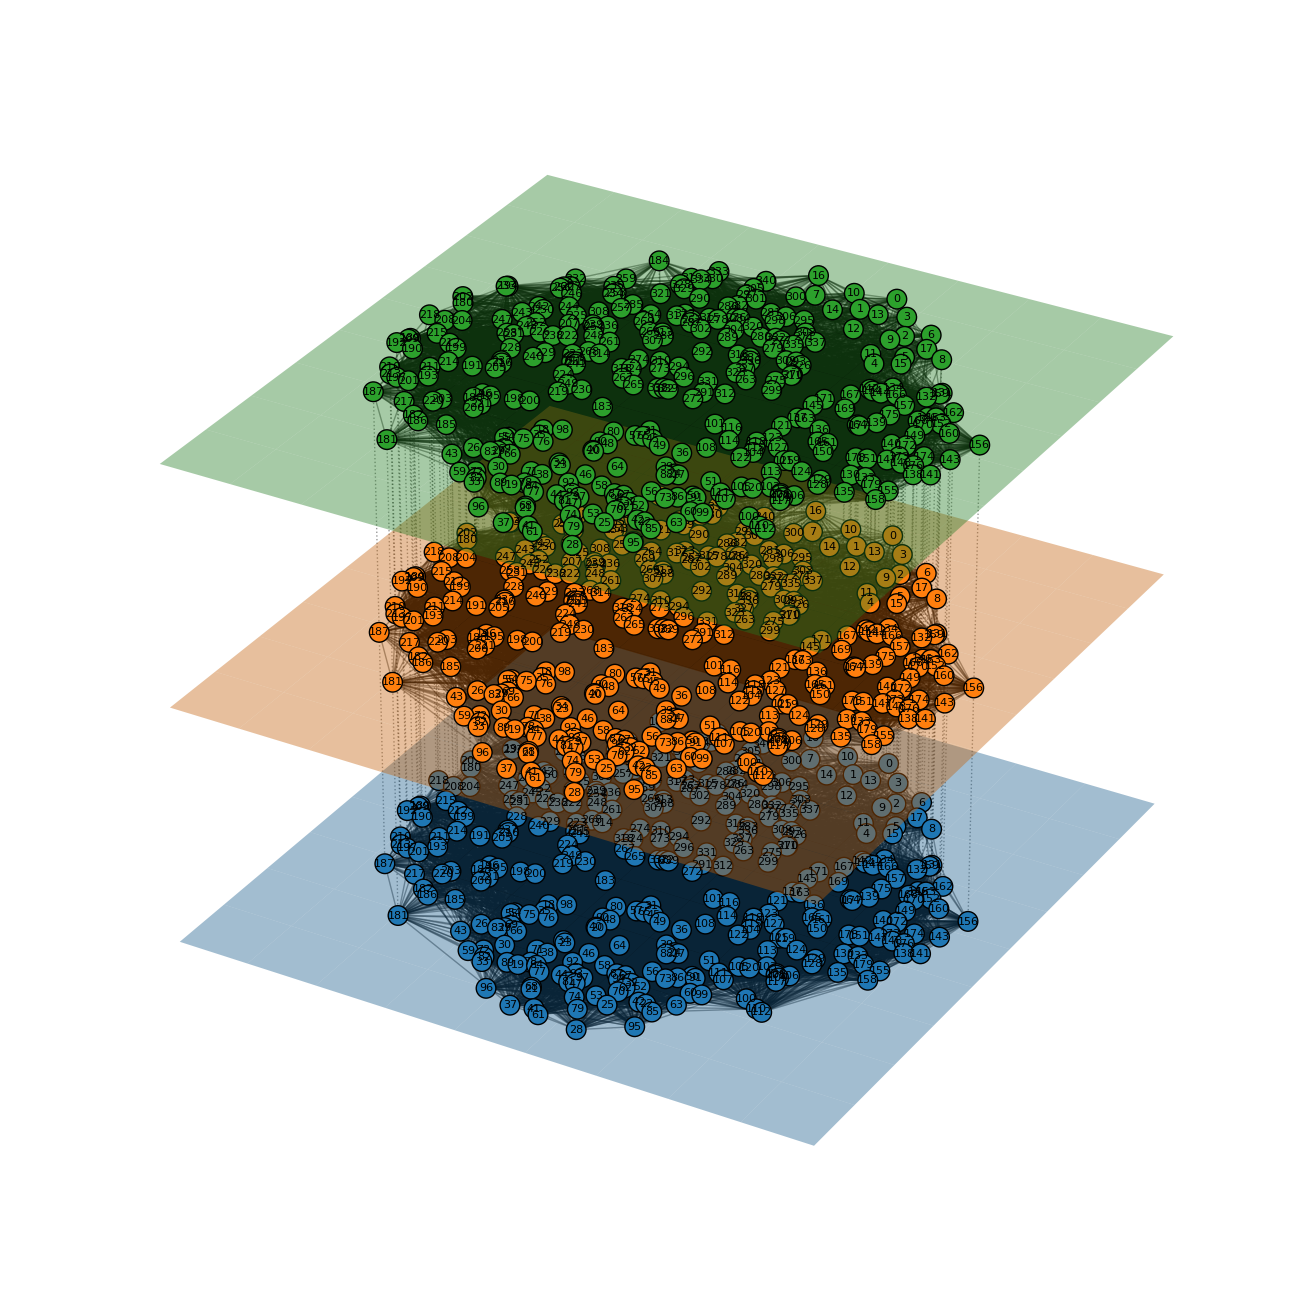

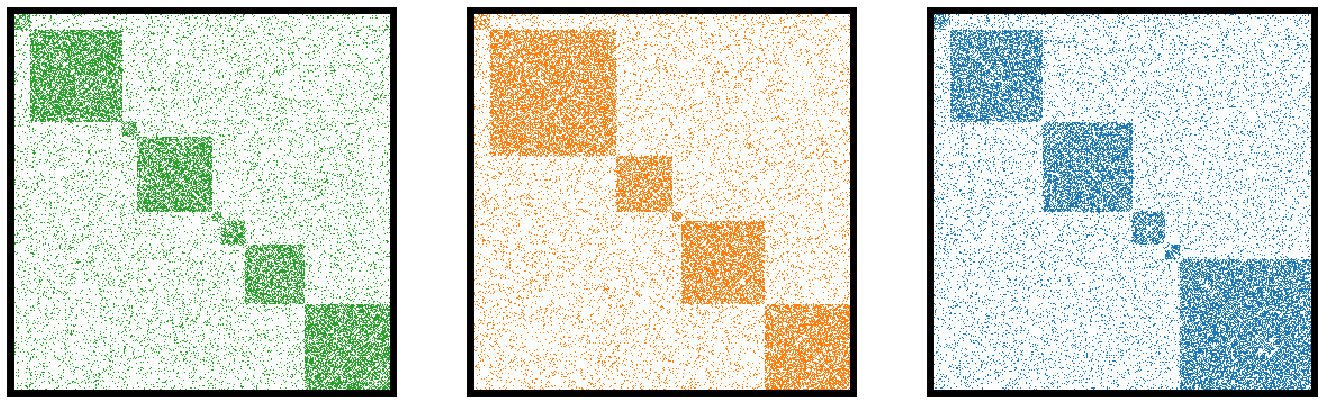

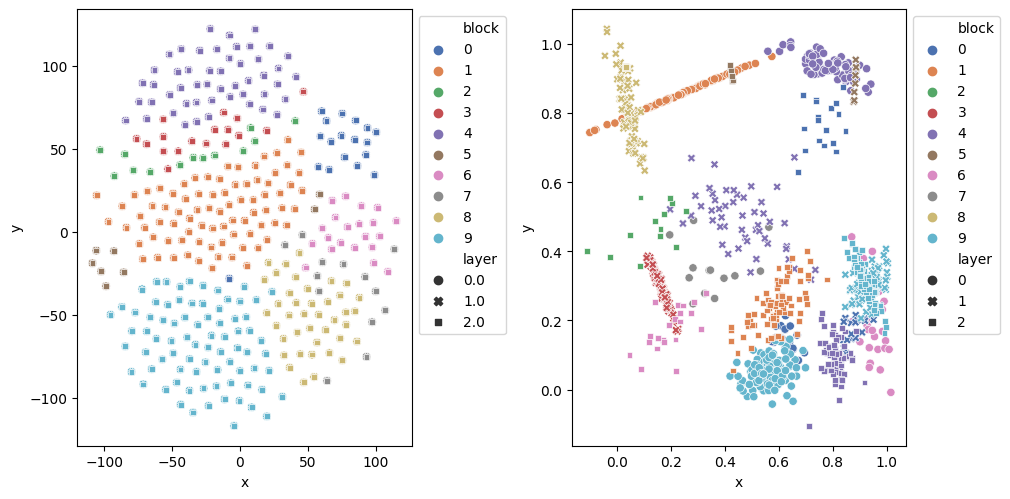

In [10]:
sampled_SBMs = {}
sampled_STR_pts = {}
sampled_GMMs_struct = {}
sampled_GMMs_attr = {}
sampled_GMMs_full = {}

for i,blocks in enumerate(mixed_blocks):
    for s in range(SBM_samples):
        id = f"SBM{i}_s{s}"

        #Sample from SBM according to mixed blocks
        sampled_SBMs[id] = multinet_lib.SBM_Multiplex(layers=layers,attributes=True,blocks=blocks,self_connectivity = inner_connectivity,outer_connectivity = outer_connectivity,plot=True)
        
        #Compute high-dim strutural representation and plot 2D embedding of it
        average_block_size = float(np.sum(blocks) / (layers * len(blocks[0])))
        sampled_SBMs[id].structural_embedding(save_path,f"{id}",ground_truth=true_blocks[i],q=1.0,s=1/average_block_size,num_walks=50)


        #Fit Gaussian for Structures
        sampled_GMMs_struct[id] = fit_GMM(sampled_SBMs[id].structural_embd_array,n_components=np.count_nonzero(mixed_blocks[i]))

        #Fit Gaussian for Attributes
        #sampled_GMMs_attr[id]= fit_GMM(sampled_SBMs[id].node_attributes,n_components=np.count_nonzero(mixed_blocks[i]))

        #sampled_GMMs_full[id] = sampled_SBMs[id].fit_GMM_over_struct_and_atr(n_components=np.count_nonzero(mixed_blocks[i]))

    

In [11]:

def GMM_wasserstein_dist(GMM0,GMM1):
    K0,d = GMM0.means_.shape #currently only for d1 = d2
    K1, _ = GMM1.means_.shape

    pi0=GMM0.weights_
    mu0=GMM0.means_
    S0=GMM0.covariances_

    pi1=GMM1.weights_
    mu1=GMM1.means_
    S1=GMM1.covariances_

    wstar,dist = GW2(np.ravel(pi0),np.ravel(pi1),mu0.reshape(K0,d),mu1.reshape(K1,d),S0.reshape(K0,d,d),S1.reshape(K1,d,d))
    return dist


def pairwise_GMM_wasserstein_dist(GMMs):
    dist = np.zeros((len(GMMs),len(GMMs)))
    for i,gmm1 in enumerate(GMMs):
        for j,gmm2 in enumerate(GMMs):
            dist[i,j] = GMM_wasserstein_dist(gmm1,gmm2)


    sns.heatmap(dist) #,xticklabels=graph_iter_labels, yticklabels=graph_iter_labels,cmap="crest")

#roation/reflection invariant OT
def inner_GMM__wasserstein_dist(GMM, pts=None,shape_only=False):
    GMM = deepcopy(GMM)

    pi=GMM.weights_
    mu=GMM.means_
    S =GMM.covariances_
    
    #pts_of_comps = [[]] * len(S)

    
    #print(comp_of_pts)

    aligned_S = np.copy(GMM.covariances_)

    if shape_only:
        comp_of_pts = GMM.predict(pts)
        for component,(mu_,s) in enumerate(zip(mu,S)):   

            #pca = PCA()
            #pca.fit(pts[comp_of_pts==component]-mu_)

            _, _, Vt = np.linalg.svd(pts[comp_of_pts==component]-mu_)

            aligned_S[component]  = np.cov(((pts[comp_of_pts==component]-mu_)@ Vt).T)

            #plt.figure(component+2)
            #v , w = np.linalg.eigh(s)
            #plt.scatter(v,w)

            #plt.scatter(s[:, 0],s[:, 1])
            #plt.scatter(((pts[comp_of_pts==component]-mu_)@ Vt )[:, 0],((pts[comp_of_pts==component]-mu_)@ Vt)[:, 1])

            #aligned_S[component]  = ((s-mu_) @ Vt ) +mu_

            #
            #s = s.reshape(-1, 1) 
            #print(s)                   

            #aligned_S[component] = pca.get_covariance() # sorted_by_order # np.squeeze(pca.fit_transform(s))

            #print(aligned_S[component])

        GMM.covariances_=aligned_S

    #plot_ellipses(GMM, pts)
    #compute pairwise wassersteins dists between gaussians
    dist = np.zeros((len(mu),len(mu)))
    for i,(m0,S0) in enumerate(zip(mu,aligned_S)):
        for j,(m1,S1) in enumerate(zip(mu,aligned_S)):
            #print(S0)
            dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1) 
    return dist
    

def inner_pts_dist(pts, dist_measure=np.linalg.norm):
    dist = np.zeros((len(pts),len(pts)))
    for i, pt1 in enumerate(pts):
        for j, pt2 in enumerate(pts):
            dist[i,j] = dist_measure(pt1-pt2)
    return dist


In [13]:
#Unit based
inner_W_dist_pts = {}
for id, pts in sampled_STR_pts.items():
    inner_W_dist_pts[id] = inner_pts_dist(pts)

print(inner_W_dist_pts)
dist = np.zeros((len(sampled_STR_pts),len(sampled_STR_pts)))

for i,(dists1, pts1) in enumerate(zip(inner_W_dist_pts.values() ,sampled_STR_pts.values())):
    for j,(dists2, pts2) in enumerate(zip(inner_W_dist_pts.values() ,sampled_STR_pts.values())):
        w2, log = ot.gromov.gromov_wasserstein(
        C1=dists1, C2=dists2, p=np.ones((len(pts1)))/len(pts1), q=np.ones((len(pts2)))/len(pts2),loss_fun =  'square_loss', verbose=False, log=True)
        dist[i,j] = log['gw_dist']

sns.heatmap(dist,xticklabels=inner_W_dist_pts.keys(),yticklabels=inner_W_dist_pts.keys(),cmap="crest")

{}


ValueError: zero-size array to reduction operation fmin which has no identity

In [14]:
from matplotlib.colors import LogNorm, Normalize

#Population based
inner_W_dist_GMMs = {}
for id, gmm in sampled_GMMs_struct.items():
    inner_W_dist_GMMs[id] = inner_GMM__wasserstein_dist(gmm)

dist = np.zeros((len(sampled_GMMs_struct),len(sampled_GMMs_struct)))

for i,(dists1, gmm1) in enumerate(zip(inner_W_dist_GMMs.values() ,sampled_GMMs_struct.values())):
    for j,(dists2, gmm2) in enumerate(zip(inner_W_dist_GMMs.values() ,sampled_GMMs_struct.values())):
        w2, log = ot.gromov.gromov_wasserstein(
        C1=dists1, C2=dists2, p=gmm1.weights_, q=gmm2.weights_,loss_fun =  'square_loss', verbose=False, log=True)
        dist[i,j] = log['gw_dist']


NameError: name 'sampled_GMMs' is not defined

<Axes: >

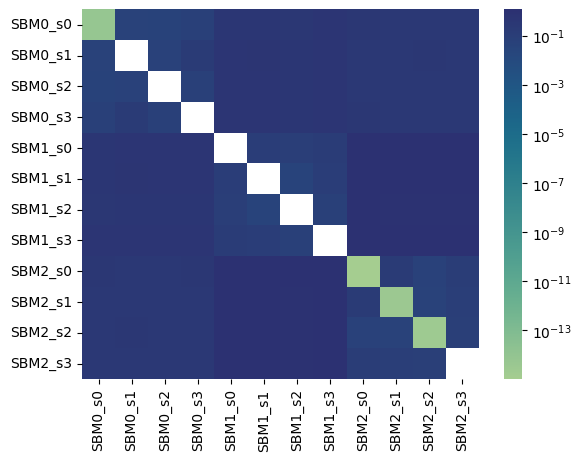

In [ ]:

sns.heatmap(dist,xticklabels=inner_W_dist_GMMs.keys(),yticklabels=inner_W_dist_GMMs.keys(),cmap="crest",norm=LogNorm(),vmax=1.,vmin= 10. ** -4)

/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)


/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)
/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)
/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)
/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)
/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m0=m0,m1=m1,Sigma0=S0,Sigma1=S1)
/tmp/ipykernel_476129/598458581.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  dist[i,j] = GaussianW2(m

<Axes: >

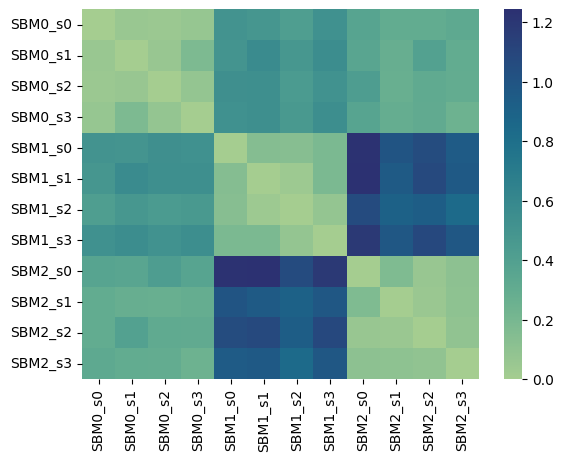

In [ ]:
inner_W_dist_GMMs_onlyShape = {}
for id, gmm in sampled_GMMs.items():
    inner_W_dist_GMMs_onlyShape[id] = inner_GMM__wasserstein_dist(gmm,pts=sampled_STR_pts[id],shape_only=True)

dist = np.zeros((len(sampled_GMMs),len(sampled_GMMs)))

for i,(dists1, gmm1) in enumerate(zip(inner_W_dist_GMMs_onlyShape.values() ,sampled_GMMs.values())):
    for j,(dists2, gmm2) in enumerate(zip(inner_W_dist_GMMs_onlyShape.values() ,sampled_GMMs.values())):
        w2, log = ot.gromov.gromov_wasserstein(
        C1=dists1, C2=dists2, p=gmm1.weights_, q=gmm2.weights_,loss_fun =  'square_loss', verbose=False, log=True)
        dist[i,j] = log['gw_dist']

sns.heatmap(dist,xticklabels=inner_W_dist_GMMs_onlyShape.keys(),yticklabels=inner_W_dist_GMMs_onlyShape.keys(),cmap="crest")